Let's compare our search engine to simple google results. We will use the same query, with the exception that our google search will have the added keywords "google deepmind paper" to get more precise results. We will then compare the similarity scores between the top 10 abstracts.

eg.

query: "computer vision"

-> google: "computer vision google deepmind paper"

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def find_similarity_score(query, abstract):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([query, abstract])
    sim_matrix = cosine_similarity(tfidf[0:1], tfidf[1:2])
    return sim_matrix[0][0]


In [68]:
from funcs import DocumentSearch, Recommender

queries = [
    "automated discovery of interpretable cognitive programs underlying reward-guided behavior ",
    "deep learning"
]
search = DocumentSearch()

search_results = []

for query in queries:
    search_results.append(search.search(query, 5))

google_scores1 = []
google_scores2 = []
with open("./google_results/computer_vision.txt", "r", encoding="utf-8") as file:
    for line in file:
        google_scores1.append(find_similarity_score(queries[0], line))

with open("./google_results/deep_learning", "r", encoding="utf-8") as file:
    for line in file:
        google_scores2.append(find_similarity_score(queries[0], line))

our_scores1 = [search_result["similarity"] for search_result in search_results[0]]
our_scores2 = [search_result["similarity"] for search_result in search_results[1]]

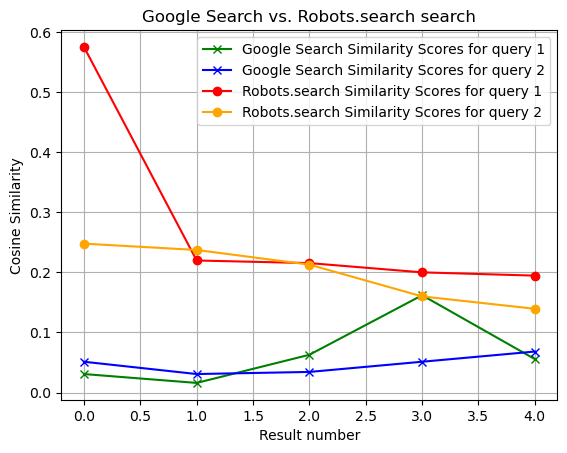

In [71]:
import matplotlib.pyplot as plt

plt.plot(google_scores1, label='Google Search Similarity Scores for query 1', marker='x', linestyle='-', color='g')
plt.plot(google_scores2, label='Google Search Similarity Scores for query 2', marker='x', linestyle='-', color='b')
plt.plot(our_scores1, label="Robots.search Similarity Scores for query 1", marker='o', linestyle="-", color='r')
plt.plot(our_scores2, label="Robots.search Similarity Scores for query 2", marker='o', linestyle="-", color='orange')

plt.xlabel("Result number")
plt.ylabel('Cosine Similarity')
plt.title('Google Search vs. Robots.search search')

plt.legend()
plt.grid(True)
plt.show()